In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from scipy.stats import zscore

In [2]:
df=pd.read_csv("all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
#fillna 
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [6]:
me=df["open"].mean()

In [7]:
df["open"]=df["open"].fillna(me)
df["open"].isnull().sum()

0

In [8]:
df["high"]=df["high"].fillna(method="bfill")
df["high"].isnull().sum()

C:\Users\rajat\AppData\Local\Temp\ipykernel_7112\1986259490.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["high"]=df["high"].fillna(method="bfill")


0

In [9]:
df["low"]=df["low"].fillna(method="ffill")
df["low"].isnull().sum()


C:\Users\rajat\AppData\Local\Temp\ipykernel_7112\547246670.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["low"]=df["low"].fillna(method="ffill")


0

In [10]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
df["Name"].value_counts()

Name
AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

In [12]:
df["date"]=pd.to_datetime(df["date"])
print(df["date"].dtype)

datetime64[ns]


In [13]:
X=df.iloc[:,[1,2,3,5]]
y=df.iloc[:,4]

In [14]:
X

,open,high,low,volume
0,15.07,15.12,14.63,8407500
1,14.89,15.01,14.26,8882000
2,14.45,14.51,14.10,8126000
3,14.30,14.94,14.25,10259500
4,14.94,14.96,13.16,31879900
...,...,...,...,...
619035,76.84,78.27,76.69,2982259
619036,77.53,78.12,76.73,2595187
619037,76.64,76.92,73.18,2962031
619038,72.74,74.56,72.13,4924323


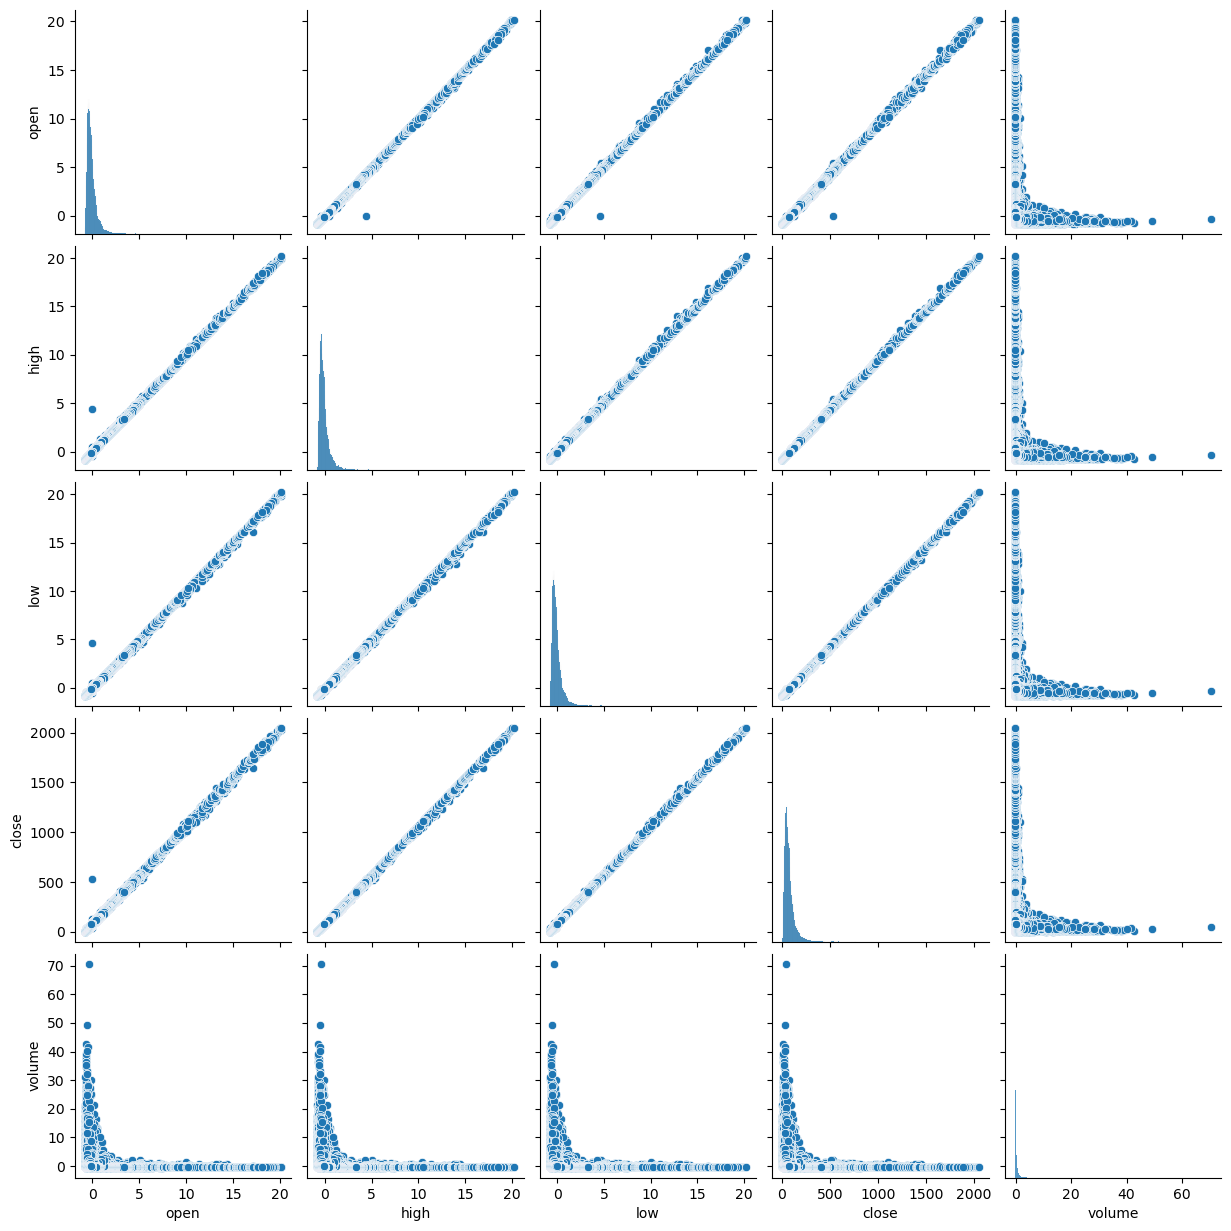

In [215]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='date', ylabel='close'>

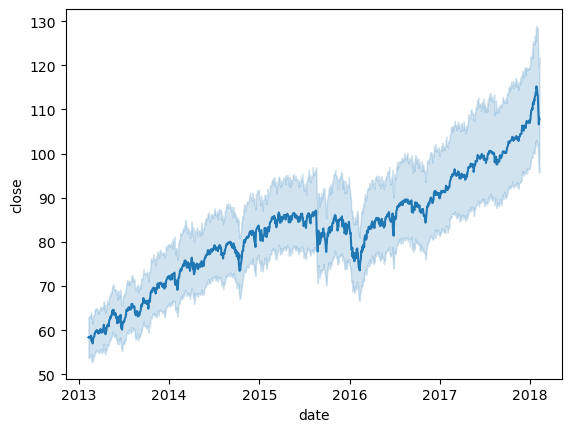

In [214]:
sns.lineplot(data=df,x="date",y="close")

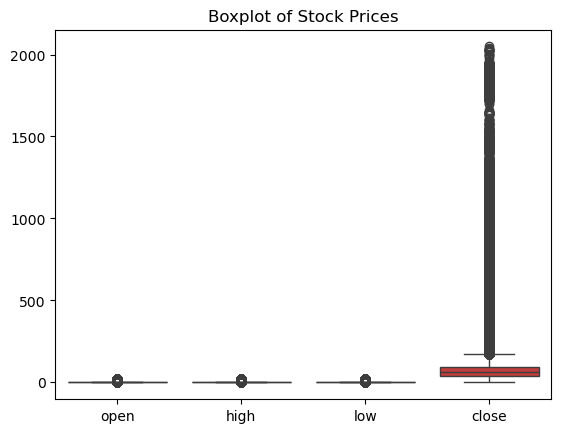

In [213]:
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title("Boxplot of Stock Prices")
plt.show()

In [18]:
#remove outlires
print("Mean_oclv",df[["open","close","low","volume"]].mean())
print("Sts_oclv",df[["open","close","low","volume"]].std())
print("Max_oclv",df[["open","close","low","volume"]].max())
print("Min_oclv",df[["open","close","low","volume"]].min())

Mean_oclv open      8.302333e+01
close     8.304376e+01
low       8.225667e+01
volume    4.321823e+06
dtype: float64
Sts_oclv open      9.737790e+01
close     9.738975e+01
low       9.650850e+01
volume    8.693610e+06
dtype: float64
Max_oclv open      2.044000e+03
close     2.049000e+03
low       2.035110e+03
volume    6.182376e+08
dtype: float64
Min_oclv open      1.62
close     1.59
low       1.50
volume    0.00
dtype: float64


In [19]:
print("Mean_oclv",df["open"].mean())
print("Sts_oclv",df["open"].std())
print("Max_oclv",df["open"].max())
print("Min_oclv",df["open"].min())

Mean_oclv 83.02333431454745
Sts_oclv 97.37790385452799
Max_oclv 2044.0
Min_oclv 1.62


In [20]:
print("Highest Value Of Open",df["open"].mean()+3*df["open"].std())
print("lowest value of open",df["open"].mean()-3*df["open"].std())

Highest Value Of Open 375.15704587813144
lowest value of open -209.1103772490365


In [21]:
df[(df["open"]>375.15) | (df["open"]<-209.11)]

,date,open,high,low,close,volume,Name
46589,2013-11-26,377.61,382.5000,374.8175,381.37,2730689,AMZN
46590,2013-11-27,383.50,387.0000,382.6110,386.71,2269656,AMZN
46591,2013-11-29,389.10,394.0999,388.6200,393.62,2405985,AMZN
46592,2013-12-02,399.00,399.0000,389.1000,392.30,4718883,AMZN
46593,2013-12-03,390.11,390.9490,383.1000,384.66,3707536,AMZN
...,...,...,...,...,...,...,...
504442,2018-02-01,414.78,416.7600,408.3900,412.13,876285,SHW
504443,2018-02-02,411.90,413.7800,402.4600,403.13,660187,SHW
504444,2018-02-05,400.00,406.7200,393.2200,393.23,1192301,SHW
504445,2018-02-06,388.00,406.0400,383.8850,405.00,1057495,SHW


In [22]:
new_df=df[(df["open"]<375.15) & (df["open"]>-209.11)]
new_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [143]:
x = new_df[['open','high', 'low', 'volume']]
y = new_df["close"]

In [23]:
df.shape, new_df.shape

((619040, 7), (610526, 7))

In [147]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,-0.697832,-0.699114,-0.700733,14.75,0.469964,AAL
1,2013-02-11,-0.699680,-0.700234,-0.704567,14.46,0.524544,AAL
2,2013-02-12,-0.704199,-0.705325,-0.706225,14.27,0.437583,AAL
3,2013-02-13,-0.705739,-0.700947,-0.704671,14.66,0.682994,AAL
4,2013-02-14,-0.699167,-0.700743,-0.715965,13.99,3.169926,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,-0.063498,-0.056094,-0.057681,77.82,-0.154086,ZTS
619036,2018-02-02,-0.056413,-0.057621,-0.057266,76.78,-0.198610,ZTS
619037,2018-02-05,-0.065552,-0.069840,-0.094051,73.83,-0.156413,ZTS
619038,2018-02-06,-0.105602,-0.093871,-0.104930,73.27,0.069304,ZTS


In [145]:
z_scores = df[['high', 'low', 'volume']].apply(zscore)

In [225]:
df_cleaned = df[(z_scores < 3)&df(z_scores > 3).all(axis=1)]


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2428381931.py, line 1)

In [181]:
df_cleaned.shape

(600887, 7)

In [183]:
x = df_cleaned[['open','high', 'low', 'volume']]
y = df_cleaned["close"]

In [185]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [187]:
X_train

,open,high,low,volume
114828,-0.712928,-0.710620,-0.712753,1.494543
318641,-0.615883,-0.615924,-0.614316,-0.148413
5397,-0.105192,-0.104155,-0.101200,-0.350545
493181,-0.078081,-0.075033,-0.074778,-0.387957
266906,-0.124293,-0.116170,-0.122442,-0.086751
...,...,...,...,...
576094,-0.182314,-0.184494,-0.181090,-0.045364
89700,0.326837,0.326358,0.330990,-0.088562
454501,-0.317971,-0.318088,-0.314446,-0.464041
211187,-0.544203,-0.544749,-0.544063,0.199957


In [189]:
X_test

,open,high,low,volume
477917,0.329918,0.353953,0.340212,-0.256894
379515,-0.315917,-0.318189,-0.316207,-0.080571
585880,-0.103446,-0.108509,-0.106381,0.213399
375633,1.006252,1.014487,1.019117,-0.447648
497466,0.341522,0.337152,0.330472,-0.310975
...,...,...,...,...
490072,0.134083,0.128412,0.113600,-0.283181
366153,0.758455,0.759814,0.770641,-0.160668
491942,-0.522792,-0.525351,-0.524060,-0.340125
421619,-0.352784,-0.356170,-0.356618,-0.269770


In [191]:
y_train

114828     13.96
318641     23.10
5397       72.70
493181     75.96
266906     72.27
           ...  
576094     65.63
89700     115.81
454501     52.47
211187     29.86
106177     39.98
Name: close, Length: 420620, dtype: float64

In [155]:
y_test

4473       60.230
611416     61.350
515794    162.610
379915     73.420
137679    135.200
           ...   
44032      92.160
55465      84.160
451641    112.620
552557     44.890
292466     48.916
Name: close, Length: 183158, dtype: float64

In [193]:
lr=LinearRegression()

In [195]:
lr.fit(X_train,y_train)

LinearRegression()

In [197]:
y_test

477917    118.210
379515     51.990
585880     72.150
375633    183.410
497466    114.700
           ...   
490072     93.430
366153    157.300
491942     31.765
421619     48.590
553722     46.120
Name: close, Length: 180267, dtype: float64

In [199]:
Y_pred=lr.predict(X_test)
Y_pred

array([117.76425369,  52.08370392,  72.36677151, ...,  31.84807112,
        48.15483034,  46.00132087])

In [201]:
y_test.values

array([118.21 ,  51.99 ,  72.15 , ...,  31.765,  48.59 ,  46.12 ])

In [203]:
print("MAE",mean_absolute_error(y_test,Y_pred))

MAE 0.3072319425171377


In [220]:
print("MSE",mean_squared_error(y_test,Y_pred))

MSE 0.26287790251387794


In [219]:
print("MSE",r2_score(y_test,Y_pred))
r2=r2_score(y_test,Y_pred)

MSE 0.9999000082574954


In [218]:
X_test.shape

(180267, 4)

In [217]:
1-((1-r2)*(185712-1)/(185712-4-1))

0.9999000061037425